## Introduction :- 
- The Data set consists of following columns 
- The columns deemed relevent to our analysis and their meaning (assumed as per my understanding) are following :- 
- "User.ID" - User Identifaction number which is unique to every user
- "Book.Title" - Title of the Book
- "Book.Rating" - The rating given by user to the book

## Objective :- 
- Our objective is to build a recommender system by using cosine simillarties score.

## Work Summary :- 
- Data is explored in order to evaluate best possible aproach
- Few visualiztion such as "Book Ratings vs Number of Ratings" and "Book Title vs Count of Rating" are plot to have a bird eye view of Data
- User-User and Item-Item similarity matrix is prepared and data is brought in suitable form so that it can be further processed
- Finally a method to get is devised (explained in last but 4th cell) to get recommendation for any user_id in the record

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
book_df = pd.read_csv('book.csv',encoding='latin')
book_df.head(3)

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


In [3]:
book_df = book_df.iloc[:,1:]

In [4]:
book_df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [5]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


## Data Vizualization :- 

In [6]:
df = book_df.copy()
df.columns = ['user_Id','Title','Rating']
df.head(1)

,user_Id,Title,Rating
0,276726,Classical Mythology,5


In [7]:
df.shape

(10000, 3)

In [8]:
len(df.user_Id.unique())

2182

+ 2182 Unique ' user_id ' in data

In [9]:
len(df.Title.unique())

9659

+ 9659 Unique books in data

In [10]:
len(df.Rating.unique())

10

+ There are 10 unique values of rating in data

In [11]:
ratings = df['Rating'].value_counts()
ratings

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Rating, dtype: int64

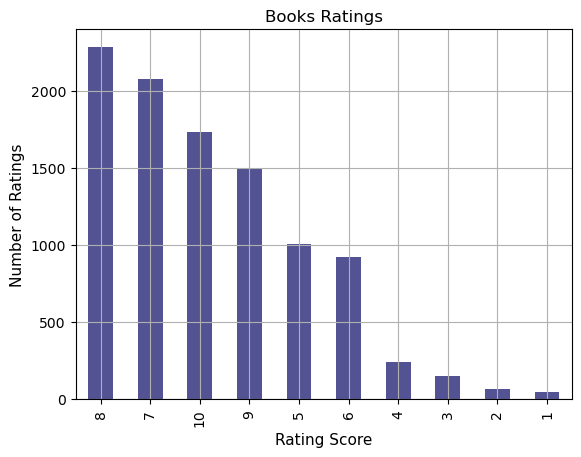

In [12]:
ratings.plot(kind = 'bar',color = 'midnightblue',grid = True , alpha = 0.75, title = 'Books Ratings')
plt.xlabel("Rating Score",fontsize = 11)
plt.ylabel("Number of Ratings", fontsize = 11)
plt.show()

In [13]:
popular_books = df.groupby('Title').agg('count').Rating.sort_values(ascending = False).head(10)
popular_books

Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Rating, dtype: int64

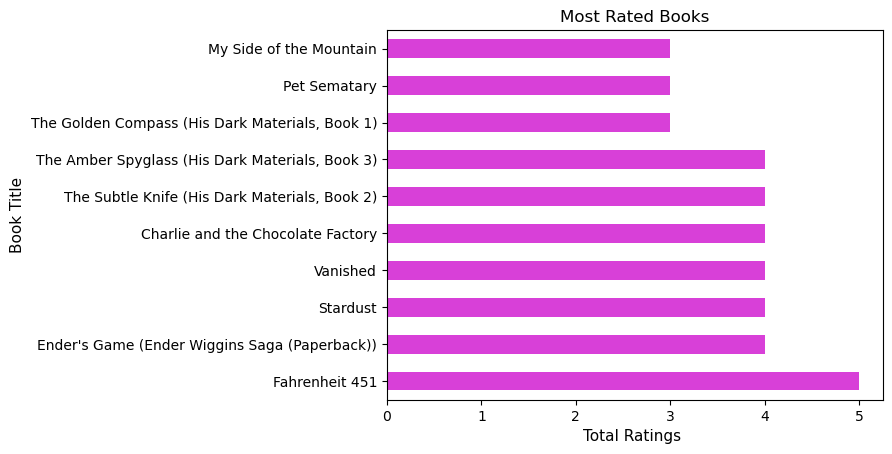

In [14]:
popular_books.plot(kind = 'barh',color = '#cc00cc', alpha = 0.75, title = 'Most Rated Books')
plt.xlabel("Total Ratings ", fontsize = 11)
plt.ylabel("Book Title", fontsize = 11)
plt.show()

## User-book-matrix and Book-user matrix

In [15]:
use_book_mat = pd.pivot_table(data = df,index='user_Id',columns='Title',values='Rating')
use_book_mat

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
user_Id,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


+ 'NaN' values are replaced with 0  

In [16]:
use_book_mat.fillna(0,inplace=True)

In [17]:
book_user_mat = pd.pivot_table(data = df, index= 'Title',columns='user_Id',values = 'Rating')
book_user_mat

user_Id,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Stories;Merril;1985;McClelland &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repairing PC Drives &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Well, there's your problem\: Cartoons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


+ 'NaN' Values are replaced with 0

In [18]:
book_user_mat.fillna(0,inplace=True)

## User Similarity Matrix and Book Similarity Matrix

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
user_sim_matrix = cosine_similarity(use_book_mat)
user_sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [21]:
book_sim_matrix = cosine_similarity(book_user_mat)
book_sim_matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

+ This 'user_sim_matrix' indicates the similarity of one user w.r.t other users; diagonal element indicate the  similarity of the user with itself hence it is 1. But that result is of no use to us so we convert diagonal elements to 0

+ This 'book_sim_matrix' indicates the similarity of one book w.r.t other books based on rating given by user; diagonal element indicate the  similarity of the user with itself hence it is 1. But that result is of no use to us so we convert diagonal elements to 0

In [22]:
np.fill_diagonal(user_sim_matrix,0)

In [23]:
np.fill_diagonal(book_sim_matrix,0)

In [24]:
user_sim_df = pd.DataFrame(data=user_sim_matrix,columns=df.user_Id.unique(),index=df.user_Id.unique())
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
book_sim_df = pd.DataFrame(data=book_sim_matrix,columns=df.Title.unique(),index = df.Title.unique())
book_sim_df

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cannibal In Manhattan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How to Flirt: A Practical Guide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## From the values in above two data frames 'user_sim_df' and 'book_sim_df' it is seems approriate that we use 'book_sim_dif' for recommendation to user. 

+ Further it seems relevant to evaluate and recommend based on similarity between two books as compared to similarity between two users because similarity between two users in highly unpredictable in general

### Steps to be followed for recommendation :- 
1. For any particular user_Id find the book 'Title' which recieved maximum rating by the user from 'use_book_mat' DataFrame
2. Corrosponding to the 'Title' with maximum rating find the most similar book from 'book_sim_df' DataFrame
3. Recommond the user most similar book 

## Example :- 

In [26]:
df.user_Id

0       276726
1       276729
2       276729
3       276736
4       276737
         ...  
9995    162121
9996    162121
9997    162121
9998    162121
9999    162129
Name: user_Id, Length: 10000, dtype: int64

## Change the variable 'user' with desired user_id  and re-run the following two cells in order to see the working of recommendation method formulated :- 

+ Find the Highest Rated Book by the user with 'user_id' :- 

In [33]:
user = 162129
fav_book = use_book_mat.loc[user].sort_values(ascending = False)[:1].first_valid_index()
print(f"Most Highly Rated Book by the user with user_id {user} is :-   {fav_book}")

Most Highly Rated Book by the user with user_id 162129 is :-   Kids Say the Darndest Things


+ Evaluate the top 3 similar books and recommend the first result

In [32]:
recommended_book = book_sim_df.loc[fav_book].sort_values(ascending = False)[:3].first_valid_index()
print(f"Recommended book for user with user_id {user} is :-   {recommended_book}")

Recommended book for user with user_id 162129 is :-   Justine - El Cuarteto de Alejandria I
